# Análise Exploratória: Medalhistas dos Jogos Olímpicos Paris 2024

##### Esse projeto busca apresentar uma análise sobre os atletas ganhadores de medalhas dos jogos olímpicos de verão, Paris 2024.

In [71]:
#importando as bibliotecas que iremos utilizar:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### Conhecendo e Preparando os Dados

In [61]:
medalhistas = pd.read_csv('medallists.csv')

In [58]:
medalhistas.head()

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code
0,2024-07-27,Gold Medal,1,EVENEPOEL Remco,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136
1,2024-07-27,Silver Medal,2,GANNA Filippo,Male,Italy,ITA,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520
2,2024-07-27,Bronze Medal,3,van AERT Wout,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147
3,2024-07-27,Gold Medal,1,BROWN Grace,Female,Australia,AUS,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173
4,2024-07-27,Silver Medal,2,HENDERSON Anna,Female,Great Britain,GBR,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525


In [59]:
#Usando o comando shape onde podemos ver o total de medalhistas (2271):
medalhistas.shape

(2271, 16)

In [60]:
medalhistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   medal_date    2271 non-null   object
 1   medal_type    2271 non-null   object
 2   medal_code    2271 non-null   int64 
 3   name          2252 non-null   object
 4   gender        2252 non-null   object
 5   country       2252 non-null   object
 6   country_code  2252 non-null   object
 7   nationality   2250 non-null   object
 8   team          1502 non-null   object
 9   team_gender   1502 non-null   object
 10  discipline    2271 non-null   object
 11  event         2271 non-null   object
 12  event_type    2271 non-null   object
 13  url_event     2271 non-null   object
 14  birth_date    2252 non-null   object
 15  code          2271 non-null   object
dtypes: int64(1), object(15)
memory usage: 284.0+ KB


In [82]:
Tipo = medalhistas.groupby('medal_type').size()
print(Tipo)

medal_type
Bronze Medal    792
Gold Medal      737
Silver Medal    742
dtype: int64


### Medalhistas de Ouro por Gênero

In [26]:
#Localizando no data frame todos os medalhistas de ouro do sexo masculino:
Md_masc = medalhistas.loc[(medalhistas['medal_type']=='Gold Medal') & (medalhistas['gender']== 'Male')]

#Localizando no data frame todas as medalhistas de ouro do sexo feminino:
Md_fem = medalhistas.loc[(medalhistas['medal_type']=='Gold Medal') & (medalhistas['gender']== 'Female')]

In [32]:
#Encontrando o total de medalhistas. Para isso vamos achar o total de linhas dos novos data frames:
print(Md_masc.shape[0])
print(Md_fem.shape[0])

368
363


### Medalhistas por Idade

In [65]:
#Convertendo a coluna 'birth_date' para o formato datetime:
medalhistas['birth_date'] = pd.to_datetime(medalhistas['birth_date'])

#Calculando a idade atual e adicionando uma nova coluna:
medalhistas['idade'] =  medalhistas['birth_date'].apply(lambda x: datetime.now().year - x.year - ((datetime.now().month, datetime.now().day) < (x.month, x.day)))

print(medalhistas.groupby['idade'])

0       24.0
1       28.0
2       29.0
3       32.0
4       25.0
        ... 
2266    30.0
2267    21.0
2268    18.0
2269    29.0
2270    29.0
Name: idade, Length: 2271, dtype: float64


In [66]:
#Agrupando por faixa etária e adicionando uma nova coluna:
bins = [0, 18, 25, 35, 50, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51+']
medalhistas['faixa_etaria'] = pd.cut(medalhistas['idade'], bins, labels=labels, right=False)

In [67]:
#Exibindo a quantidade de atletas em cada faixa etária:
Md_group = medalhistas.groupby('faixa_etaria').size()
print(Md_group)

faixa_etaria
0-18       39
19-25     767
26-35    1308
36-50     133
51+         5
dtype: int64


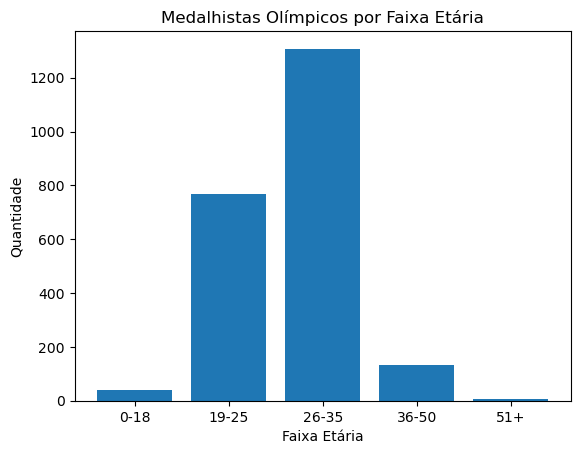

In [80]:
#Vamos visualizar isso melhor, plotando o agrupamento de atletas medalhistas em um gráfico:
plt.bar(labels, Md_group)
plt.title('Medalhistas Olímpicos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.show()

### Medalhista Mais Novo e Mais Velho:

In [68]:
#Achando o(a) atleta mais novo a ganhar uma medalha nos Jogos Olímpicos 2024:
Med_novo = medalhistas['idade'].idxmin()
print(medalhistas.iloc[Med_novo])

medal_date                                             2024-07-28
medal_type                                             Gold Medal
medal_code                                                      1
name                                               YOSHIZAWA Coco
gender                                                     Female
country                                                     Japan
country_code                                                  JPN
nationality                                                 Japan
team                                                          NaN
team_gender                                                   NaN
discipline                                          Skateboarding
event                                              Women's Street
event_type                                                    ATH
url_event       /en/paris-2024/results/skateboarding/women-s-s...
birth_date                                    2009-09-22 00:00:00
code      

In [69]:
#Achando o(a) atleta mais velho a ganhar uma medalha nos Jogos Olímpicos 2024:
Med_velho = medalhistas['idade'].idxmax()
print(medalhistas.iloc[Med_velho])

medal_date                                             2024-08-02
medal_type                                           Silver Medal
medal_code                                                      2
name                                                  KRAUT Laura
gender                                                     Female
country                                             United States
country_code                                                  USA
nationality                                         United States
team                                     United States of America
team_gender                                                     O
discipline                                             Equestrian
event                                                Jumping Team
event_type                                                   TEAM
url_event       /en/paris-2024/results/equestrian/jumping-team...
birth_date                                    1965-11-14 00:00:00
code      